<h1 align="center">Linear Regression Project </h1> 

## Car Price Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [71]:
df= pd.read_csv("car_data.csv") #dataset from kaggle

In [72]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [74]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Exploratory Data Analysis

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

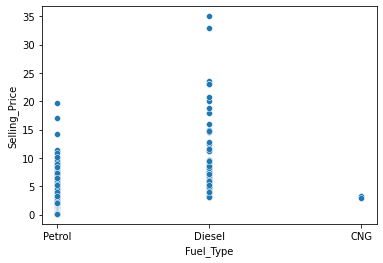

In [76]:

sns.scatterplot(y='Selling_Price',x='Fuel_Type',data=df)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

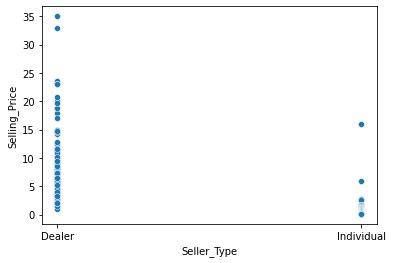

In [77]:
sns.scatterplot(x='Seller_Type',y='Selling_Price',data=df)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

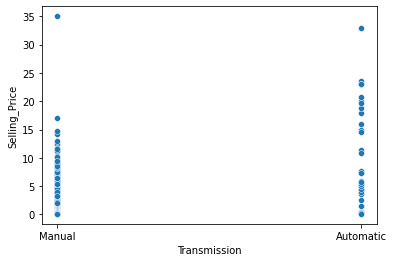

In [78]:
sns.scatterplot(x='Transmission',y='Selling_Price',data=df)

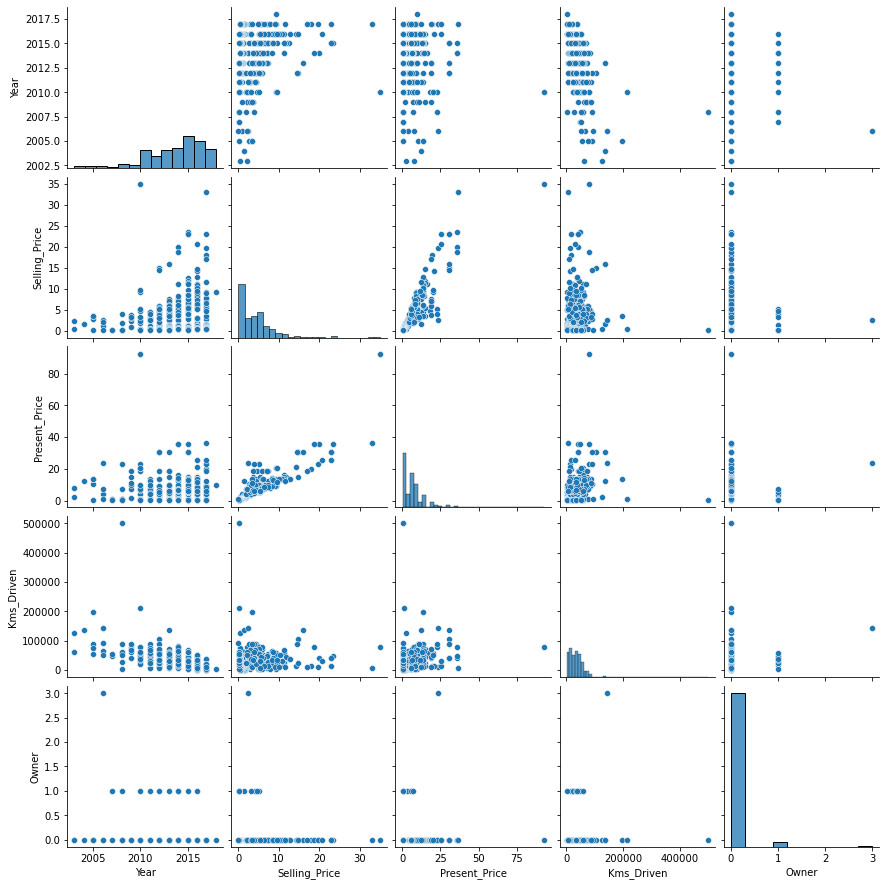

In [79]:
sns.pairplot(df)

### Converting categorical variables

In [80]:
df= pd.get_dummies(df,columns=['Seller_Type','Transmission'],drop_first=True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,Petrol,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,0,0,1


In [82]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [83]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


In [84]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.182104,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.088344,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,0.008057,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,0.089216,-0.101419,-0.162510
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.055705,-0.352415,-0.080466
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,1.000000,0.124269,-0.050316
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,0.124269,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.080466,-0.050316,0.063240,1.000000


<AxesSubplot:>

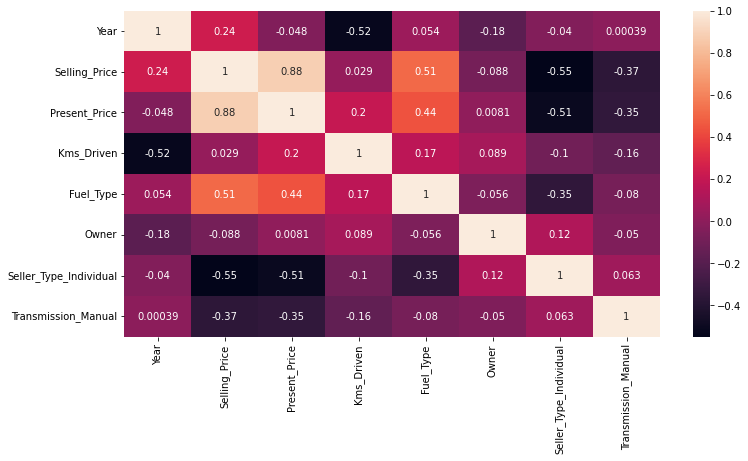

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

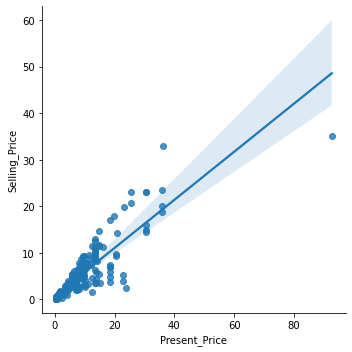

In [88]:
sns.lmplot(y='Selling_Price',x='Present_Price',data=df)

### Training and Testing Data

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X=df.drop(['Selling_Price','Car_Name'],1)
y=df['Selling_Price']

/var/folders/22/rnr_sc0s7ddcbt4klf6sc8d00000gn/T/ipykernel_1532/229839424.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop(['Selling_Price','Car_Name'],1)


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [177]:
X_train.shape

(210, 7)

In [178]:
X_test.shape

(91, 7)

In [179]:
y_train.shape

(210,)

In [180]:
y_test.shape

(91,)

### Training the model

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
lm=LinearRegression()

In [183]:
lm.fit(X_train,y_train)

LinearRegression()

### Predicting Test data

In [184]:
predictions= lm.predict(X_test)

In [185]:
predictions

array([ 2.84503948,  8.17433042,  6.15503229, -1.53474297,  9.10478102,
        7.12513416,  1.41208877,  0.85727713,  1.42824591,  7.18732696,
        8.77738476,  0.64604862,  8.19199294,  3.27496701,  6.58156734,
        3.12524913,  0.47776322, 10.71519858,  1.81845542,  2.3948969 ,
        0.40800604,  7.78763597,  6.25976337,  2.59710749,  0.8401473 ,
        3.68243396,  5.30447357,  2.81900104,  2.20840021,  1.82500826,
        0.41732684,  8.85691122, -0.6636885 ,  2.2707602 ,  8.2948583 ,
        4.51208942,  7.29749227,  7.54243321,  2.9482584 ,  7.9275823 ,
        3.90745022,  4.17258578,  4.31519575,  0.69858995,  7.02594603,
        0.53398622,  7.32449179, 11.09649499,  3.13148761,  5.06495644,
        6.60928574,  2.2345092 , 20.15115757, 16.47662698,  7.25913588,
        9.54127202,  4.43952683,  8.67649783,  1.75283042,  7.41244863,
        0.27553659, -2.53278607,  2.01366813, -1.56020807,  4.79226982,
        1.86019863, 19.80408464, 17.88217176,  5.42372796, -0.54

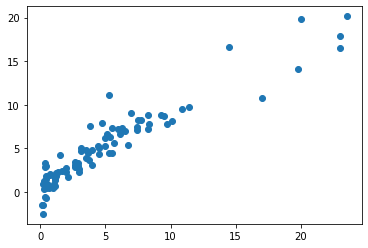

In [186]:
plt.scatter(y_test,predictions)

### Evaluating the model

In [187]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score: ',metrics.r2_score(y_test, predictions))

MAE: 1.258140470647154
MSE: 3.4932860262264684
RMSE: 1.8690334470593266
R2 score:  0.8773175030338072


<AxesSubplot:ylabel='Selling_Price'>

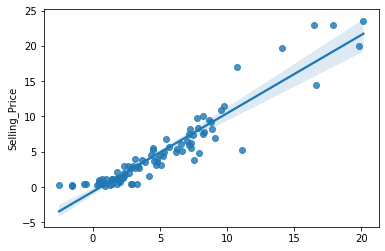

In [188]:
sns.regplot(x=predictions,y=y_test)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


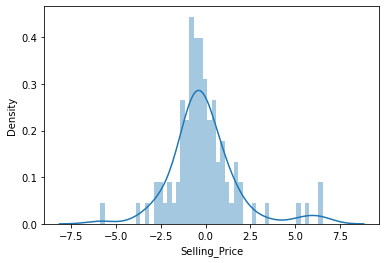

In [189]:
sns.distplot((y_test-predictions),bins=50);

In [190]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Year,0.369776
Present_Price,0.429060
Kms_Driven,-0.000004
Fuel_Type,1.447348
Owner,-1.047517
Seller_Type_Individual,-1.131128
Transmission_Manual,-1.441761


### Conclusion